## <center>Clustering - Kmeans</center>
### <center>Cheatsheet</center>

# Overview
## What is Clustering
Clustering is an <strong>unsupervised </strong>  learning technique. This means the data does <strong>not contain any label/target</strong>.
  
The goal is to <strong>divide the data points into a number of groups -> the clusters</strong>. Each group should contain data points with similar characteristics. Data points within a cluster are more similar than data points in different clusters.
  
Clustering is therefore usefull to analyse an unlabeled datasets and find groups of data points with similar properties or features.

<img src="images/clustering.png" width="500"/>

## Why use clustering?
A usecase for clustering which is simple to understand is the segmentation of customers.
  
Clustering can be used to find natural clusters. An example are customer segments. It makes it possible to find unknown properties of those groups and therefore give an answerer to the question "Who are my Customers?". Clustering makes it possible to find those segments and to characterize them for marketing purposes.
  
On the other hand clustering can be usefull to identify unusual data points. This can be used for outlier detection.

# Clustering Algorithm

# K-means
Don´t get confused with k-means and k-nearest neighbor. K-means is a clustering algorithm whereas k-nearest neighbor is a classifier.
  
The simplest algorithm for clustering is probably the K-means algorithm. It uses the distance of a point to the center of a cluster to determine the cluster of the point.
  
A downside of K-means is that <strong>you have to choose the number of clusters, the K, by yourself.</strong>

## How K-means works

1. Select K and choose <strong>random points</strong> in the dataset as the center of a Cluster. The center is also called centroids.


<img src="images/kmeans1.png" width="350">

2. Measure the euclidean distance of each point to the centroids. Every point is now a member of the cluster with the nearest centroid.

<img src="images/kmeans2.png" width="350">

3. Calculate for every cluster the new centroid by taking the average of the assigned points.

<img src="images/kmeans3.png" width="350">

4. repeat steps 2 and 3 until none of the points are changing clusters

<img src="images/kmeans456.png">

## How to choose K?
In a two dimensional space it is easy to plot the data and find K simply by looking at the plot.
We want to use more features in our analysis so plotting and reading k is not a good approach.
  
There are several ways to determine K.
If you are interested you can read this article : https://medium.com/towards-artificial-intelligence/get-the-optimal-k-in-k-means-clustering-d45b5b8a4315
  
We will take a look at the Elbow method to choose k.

### Elbow method
The elbow method uses the <strong>inertia</strong> of the clustering. <strong>The inertia is calculated as the sum of squared distance for each point to it´s closest centroid</strong>/the cluster. Therefore if the inertia is smaller the clusters should be denser.
  
<img src="images/elbow.png" width="350">

When k increases, the inertia is getting smaller. You can see a k value where the inertia decreases slower. This is the "elbow" and it indicades a good fit for k.
However, the inertia is not as meaningful as we think. The more clusters we choose , the smaller the inertia. If we would choose as many clusters as instances the inertia would be 0. Because every point would be at a distance of 0 from its cluster.

## k-means summary
<table style="width:80%">
  <tr>
    <th style="background-color: #92BB0E">pros</th>
    <th style="background-color: #BD005E">cons</th>
  </tr>
  <tr>
    <td>easy to understand</td>
    <td>multiple starts with random picked centroids</td>
  </tr>
  <tr>
              <td>fast on many instances</td>
    <td>choose k manually</td>
  </tr>
    <tr><td></td>
    <td>equal treatment of all directions</td></tr>
</table>

## Lets write code for KMeans!

## Important!
Because Kmeans and DBScan measures distances, it is <strong>important to standardize the Datasset</strong> before applying a cluster algorithm. Check out the BigDataScienceCheatsheet for more infos on standardizing and normalizing. The Dataset we will use is already standardize so we dont have to do it in this example.

## 1. Import libs and dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("cluster.csv")
del data["Unnamed: 0"]
print("this is the Dataset we want to cluster")
data.head()

this is the Dataset we want to cluster


,x,y
0,-7.338988,-7.729954
1,-7.740041,-7.264665
2,-1.686653,7.793442
3,4.422198,3.071947
4,-8.917752,-7.888196


## 2. train multiple models and safe the inertia each time

In [4]:
# this is the var where we will safe the inertia of each model
inertia = []
clustersAmount = range(1,6)

# train 6 models with 1-6 k´s
for i in clustersAmount:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data)
    # append the inertia of each model to the inertia list
    inertia.append(kmeans.inertia_)

print("this are the several inertia values of the kmeans models")
inertia

this are the several inertia values of the kmeans models


[20402.344442926293,
 5763.464789461435,
 566.8595511244132,
 496.1904564577493,
 429.7821010430649]

<strong>Note that we give the KMeans constructor the value "k-means++" for the init parameter. This means we use a more intelligent way of selecting the first initial centroids.

## 3. Plot the inertia values to use the elbow method

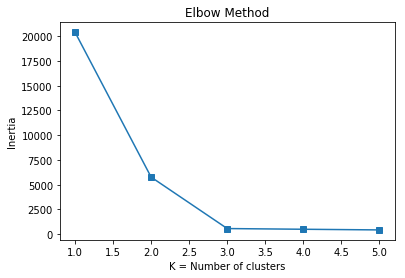

In [5]:
plt.plot(clustersAmount, inertia, "s-")
plt.title('Elbow Method')
plt.xlabel('K = Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Because of the elbow method we can see that k = 3 should be a good fit.

## Lets check the original Data
The data we used is two dimensional which makes it easy to plot and read the K. This is just for practise and checking if the elbow method is really doing a good job.

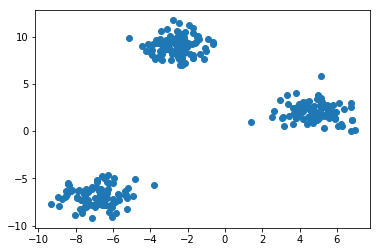

In [6]:
plt.scatter(data.x, data.y)

### Hooray! We successfully figured out k for our Dataset with the elbow method. 

## Lets check our KMeans clustering with our chosen k

In [10]:
# initialize a new instance of the kmeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
# fit the instance on the data we want to use
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [13]:
# save the cluster labels of each point
clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'tan']

vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

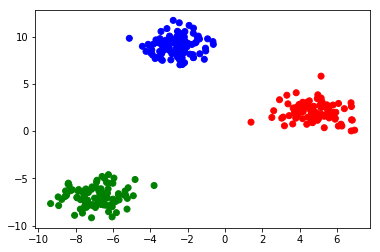

In [15]:
plt.scatter(data.x, data.y, c=vectorizer(clusters))

## Looks pretty good!

# Clustering Algorithm

# DBScan
"Density-Based Spatial Clustering of Applications with Noise"
  
The DBScan clustering algorithm is not meassuring the distance of a point to the cluster center. Instead it is <strong>density based</strong>.
  
Density based means that the algorithm uses the concept of reachability. Is a point reachable from several other points or is it a lonely point and therefore a outlier or noise point?
In contrast to k-means we dont have to choose k for DBScan. It produces the amount of clusters by itself.

## How DBScan works
The main concept is density. How many neighbours does a point have within a radius?
This radius is called epsilon and we have to choose this value. In addition we have to choose the min_samples/minPts i.e. the minimum amount of points within the radius to determine whether a point is a core point. It´s important to note that the point itself is included in the min_sample.
  
The Algorithm ends with 3 sorts of points:
- Core: these points have min_samples neighbors within epsilon 
- Border: these points are in the neighbourhod of a core point but have less than min_samples neighbors
- Noise: these points have too less neighbors and are therefore noise or outliers
  
<img src="images/dbscan.png" width="350">

## How to choose Ɛ/Epsilon and min_samples?
### min_samples
There is no general way for choosing the min_samples/minPts. It heavily depends on the dataset and the result you want to get. If you choose min_samples very small, DBScan will create more clusters out of noise. So we shouldnt choose it too small.

### Ɛ/Epsilon
To choose a good value for epsilon we can use an old friend. The elbow Method, but this time in a different way.
  
First we have to compute the k-nearest neighbor (K-NN) for every single data point. This gives us a k-distance plot of our dataset and we can understand the density distribution of our data.
When we plot the distances of each point we can use the elbow method to determine epsilon for DBScan.
  
Epsilon and min_samples depend strongly on the dataset. 

## DBScan summary
<table style="width:80%">
  <tr>
    <th style="background-color: #92BB0E">pros</th>
    <th style="background-color: #BD005E">cons</th>
  </tr>
  <tr>
    <td>also easy to understand</td>
    <td>doesn´t perform well as others when the clusters are of varying density</td>
  </tr>
  <tr>
              <td>no pre-set numbers of clusters</td>
    <td>different for high-dimensionality data because estimating epsilon will be difficult</td>
  </tr>
    <tr><td>can find outliers and unusual formed clusters well</td>
    <td></td></tr>
</table>

## Lets write code for DBScan!

## Important!
Because Kmeans and DBScan meassures distances it is <strong>important to standardize the Datasset</strong> before applying a cluster algorithm. Check out the BigDataScienceCheatsheet for more infos on standardizing and normalizing. The Dataset we will use is already standardize so we dont have to do it in this example.

## 1. Important the libs and the data

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# we will use the same dataset like in the example above
data = pd.read_csv("cluster.csv")
del data["Unnamed: 0"]
print("this is the Dataset we want to cluster")
data.head()

this is the Dataset we want to cluster


,x,y
0,-7.338988,-7.729954
1,-7.740041,-7.264665
2,-1.686653,7.793442
3,4.422198,3.071947
4,-8.917752,-7.888196


## 2. Determine epsilon and min_samples

In [43]:
from sklearn.neighbors import NearestNeighbors
neighbor = NearestNeighbors(n_neighbors=2)

# fit the instance on our data
nbrs = neighbor.fit(data)

# get the distances between each points
distances, indices = nbrs.kneighbors(data)

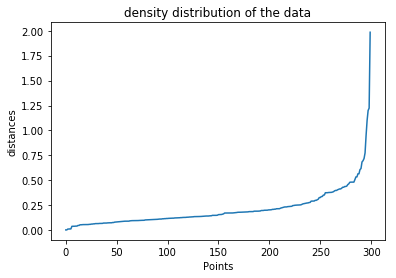

In [44]:
# sort the distances
distances = np.sort(distances, axis=0)

# remove the value before each point so that only the distances are in a list
distances = distances[:,1]

# plot the distances
plt.title("density distribution of the data")
plt.xlabel("Points")
plt.ylabel("distances")
plt.plot(distances)

The best value for epsilon is where the slope is the steepest
  
I would say <strong>in this case it is around 0.6.</strong>.

To choose min_samples we have to take a look at the size of our Dataset and choose it by intuition.
  
The Dataset contains 300 datapoints. I dont want that noise is selected as a cluster so I set min_samples to 5.

## 3. Train our DBScan model with an epsilon of 0.6

In [117]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
dbscan.fit(data)

DBSCAN(algorithm='auto', eps=0.6, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [118]:
# save the cluster labels of each point
clusters = dbscan.labels_

colors = ['#007DC5', '#BD005E', '#92BB0E', 'red', 'black']

vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

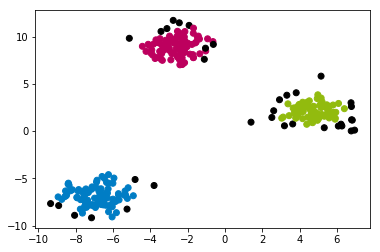

In [119]:
plt.scatter(data.x, data.y, c=vectorizer(clusters))

### Looks different than the Kmeans!

The clusters are recognized correctly. The black dots are classified as outliers because they are not core points and dont have a core point in their neighborhood.

### Play around with different values for epsilon and min_samples to get a feeling for the algorithm.

# Congrats! You learned the basics of clustering!
## There are a lot of different clustering algorithms with different strenghts and weaknesses as this image from SkLearn shows.


<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png">